                         id                                             name  \
0  62ecc47743eb9921f4be56b7        The troubled history of Jammu and Kashmir   
1  62e3bb3d4c48a5cdd5cd99c2          Patriots, Scientists. Forgotten Heroes!   
2  62e284e2c7afea30585166a4  India Inc- How India opened up to world economy   
3  62e0c0184e2beaeb406b861d                Profit Motive with Gaurav Rastogi   
4  62de399a2345d7d42ddb3114              Curtain Call with The Drama Library   

                                                text    label  segment_label  \
0  Hello and welcome to another edition of Open t...  history              0   
1  Namastkar Swagat Platform twitter Facebook Lin...  science              1   
2  So hello and welcome to another episode of Ind...  fiction              2   
3  So hello and welcome, everybody, to this editi...  history              3   
4  So hello and welcome everybody to Kulk. We are...    anime              4   

  sentiment  n_label  
0  negative    

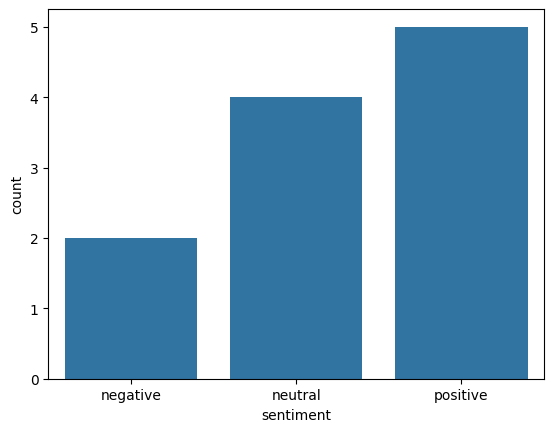

Accuracy: 0.0
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.00      0.00       2.0
     neutral       1.00      0.00      0.00       1.0
    positive       0.00      1.00      0.00       0.0

    accuracy                           1.00       3.0
   macro avg       0.67      0.33      0.00       3.0
weighted avg       1.00      0.00      0.00       3.0



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset from CSV file
data = pd.read_csv('data.csv')
# Check the structure of the dataset
print(data.head())
# Check for missing values
print(data.isnull().sum())
# Check the distribution of sentiments
label_counts = data['sentiment'].value_counts()
print(label_counts)
# Plot the distribution of sentiments
sns.countplot(x='sentiment', data=data)
plt.show()
# Features and target variable
X = data['text']
y = data['sentiment']
# Convert text data to numerical data using TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))
